In [1]:
import matplotlib.image as mpimg
from matplotlib.pyplot import *
import numpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math

caffeModel = "C:/Users/click/Phyton/DNN_V2/models/res10_300x300_ssd_iter_140000.caffemodel"
prototextPath = "C:/Users/click/Phyton/DNN_V2/models/deploy.prototxt.txt"

In [2]:
X=300
def face_detection(image):
    net = cv2.dnn.readNetFromCaffe(prototextPath,caffeModel)
    # extract the dimensions , Resize image into 300x300 and converting image into blobFromImage
    (h,w) = image.shape[:2]

    # blobImage convert RGB (104.0, 177.0, 123.0)
    blob = cv2.dnn.blobFromImage(cv2.resize(image,(X,X)),1.0,(X,X),(104.0, 177.0, 123.0))   #,(104.0, 177.0, 123.0)


    #passing blob through the network to detect and pridiction
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence and prediction
           confidence = detections[0, 0, i, 2]
           #print(confidence)
           if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                text = "{:.2f}%".format(confidence * 100)
                y = startY - 10 if startY - 10 > 10 else startY + 10
                cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
                #cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    #plt.imshow( image[startY:endY,startX:endX]) #test face extraction
    #plt.imshow(image)
    #print(image.shape)
    return image[startY:endY,startX:endX]
    

In [ ]:
img=cv2.imread("C:/Users/click/Phyton/DNN_V2/src/dataset/thor.2.1 (6).jpg",cv2.IMREAD_GRAYSCALE)
img3=cv2.equalizeHist(img)
img4=np.zeros((img.shape[0],img.shape[1]))
img4=cv2.normalize(img2,  img4, 0, 255, cv2.NORM_MINMAX)
img2=AllinOne(img)
img5=img4-img3
cv2.imwrite("contrasteDIFF.jpg",img4)

In [2]:
import cv2
import numpy as np
from PIL import Image
import os
from timeit import default_timer as timer 

# Path for face image database
path = 'LFW/training'

start = timer()
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml");
# function to get the images and label data
def getImagesAndLabels(path):
    d=0
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        #print(id)
        faces = detector.detectMultiScale(img_numpy)
        d+=1
        for (x,y,w,h) in faces:
            face=(cv2.equalizeHist(img_numpy[y:y+h,x:x+w]))
            pth='C:/Users/click/Phyton/DNN_V2/src/verification/verif%d.jpg'%d
            faceSamples.append(face)
            ids.append(id)
            print(d)
            cv2.imwrite(pth,face)
            
    return faceSamples,ids
print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))
# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainerJ.yml') 
# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))
print("sec ",round(timer() - start,2))


 [INFO] Training faces. It will take a few seconds. Wait ...
1
2
2
3
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
92
93
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
145
146
147
148
149
150
151
152
153
154
155
156
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
215
216
217
218
219
220
221
222
223
224
225
226
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
252
253
2

In [149]:
import cv2
import numpy as np
from PIL import Image
import os
# chemin de la base d'image
path = 'LFW/training'



recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml");
# fontions pour récuperer les noms de fichiers et images
def getImgsAndLabels(path):
    d=0
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = cv2.imread(imagePath) # grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        #print(id)
        faces = face_detection(img_numpy)
        d+=1
        print(d)
        print(faces.size)
        if(faces.size>0):  
            
            face=(cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY))
            facef=(cv2.equalizeHist(face))
            pth='C:/Users/click/Phyton/DNN_V2/src/verification/verif%d.jpg'%d
            faceSamples.append(facef)
            ids.append(id)   
            cv2.imwrite(pth,facef)
        
        
            
    return faceSamples,ids
print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImgsAndLabels(path)
recognizer.train(faces, np.array(ids))
# Ssauvegarde du modele
recognizer.write('trainer/trainerLFW.yml') 
# affichage du nombre de visages entrainé  
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] Training faces. It will take a few seconds. Wait ...
1
46512
2
32307
3
12921
4
33306
5
34320
6
38646
7
25086
8
46866
9
34560
10
40698
11
43470
12
39900
13
42117
14
15045
15
43452
16
41814
17
35502
18
35532
19
29637
20
38313
21
37050
22
32940
23
34104
24
39375
25
41400
26
44616
27
34398
28
40572
29
38592
30
40986
31
0
32
38070
33
41814
34
40200
35
36660
36
40500
37
39000
38
35154
39
44838
40
40449
41
47700
42
25764
43
41160
44
43368
45
41208
46
42024
47
42900
48
23310
49
37107
50
28224
51
38304
52
45045
53
47187
54
35712
55
41067
56
47286
57
37719
58
38703
59
43470
60
9555
61
44202
62
39501
63
26676
64
35136
65
35880
66
33630
67
34968
68
25650
69
42432
70
38808
71
35154
72
43146
73
39996
74
35802
75
48438
76
39285
77
28290
78
34596
79
33375
80
35490
81
43452
82
36378
83
45474
84
38514
85
45045
86
38907
87
35280
88
40800
89
39600
90
30888
91
18348
92
20988
93
28728
94
40698
95
39168
96
33672
97
42612
98
29862
99
43248
100
41310
101
35910
102
37440
103
40689
104
34272
105
32940
1

In [184]:
from re import search
names=['Colin_Powell','Donald_Rumsfeld','George_W_Bush', 'Gerhard_Schroede', 'Hugo_Chavez', 'Tony_Blair']

ide=[]

mypath='C:/Users/click/Phyton/DNN_V2/src/LFW/test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

cp=0
print(names[cp])

for f in range(435):
    print(cp)
    #si le nom d'image ne change pas on ajoute le meme ID
    if(names[cp] in onlyfiles[f]):
        ide.append(cp)
        print(cp)
    #si le nom change alors on incrémente l'ID
    else:
        ide.append(cp)
        cp+=1
        
        
    print(onlyfiles[f],onlyfiles[f+1])
    
        
    
print(ide)
print(len(ide))


Colin_Powell
0
0
Colin_Powell.1.1 1 (1).jpg Colin_Powell.1.1 1 (10).jpg
0
0
Colin_Powell.1.1 1 (10).jpg Colin_Powell.1.1 1 (11).jpg
0
0
Colin_Powell.1.1 1 (11).jpg Colin_Powell.1.1 1 (12).jpg
0
0
Colin_Powell.1.1 1 (12).jpg Colin_Powell.1.1 1 (13).jpg
0
0
Colin_Powell.1.1 1 (13).jpg Colin_Powell.1.1 1 (14).jpg
0
0
Colin_Powell.1.1 1 (14).jpg Colin_Powell.1.1 1 (15).jpg
0
0
Colin_Powell.1.1 1 (15).jpg Colin_Powell.1.1 1 (16).jpg
0
0
Colin_Powell.1.1 1 (16).jpg Colin_Powell.1.1 1 (17).jpg
0
0
Colin_Powell.1.1 1 (17).jpg Colin_Powell.1.1 1 (18).jpg
0
0
Colin_Powell.1.1 1 (18).jpg Colin_Powell.1.1 1 (19).jpg
0
0
Colin_Powell.1.1 1 (19).jpg Colin_Powell.1.1 1 (2).jpg
0
0
Colin_Powell.1.1 1 (2).jpg Colin_Powell.1.1 1 (20).jpg
0
0
Colin_Powell.1.1 1 (20).jpg Colin_Powell.1.1 1 (21).jpg
0
0
Colin_Powell.1.1 1 (21).jpg Colin_Powell.1.1 1 (22).jpg
0
0
Colin_Powell.1.1 1 (22).jpg Colin_Powell.1.1 1 (23).jpg
0
0
Colin_Powell.1.1 1 (23).jpg Colin_Powell.1.1 1 (24).jpg
0
0
Colin_Powell.1.1 1 (24).jp

['Colin_Powell.1.1 1 (1).jpg', 'Colin_Powell.1.1 1 (10).jpg', 'Colin_Powell.1.1 1 (11).jpg', 'Colin_Powell.1.1 1 (12).jpg', 'Colin_Powell.1.1 1 (13).jpg', 'Colin_Powell.1.1 1 (14).jpg', 'Colin_Powell.1.1 1 (15).jpg', 'Colin_Powell.1.1 1 (16).jpg', 'Colin_Powell.1.1 1 (17).jpg', 'Colin_Powell.1.1 1 (18).jpg', 'Colin_Powell.1.1 1 (19).jpg', 'Colin_Powell.1.1 1 (2).jpg', 'Colin_Powell.1.1 1 (20).jpg', 'Colin_Powell.1.1 1 (21).jpg', 'Colin_Powell.1.1 1 (22).jpg', 'Colin_Powell.1.1 1 (23).jpg', 'Colin_Powell.1.1 1 (24).jpg', 'Colin_Powell.1.1 1 (25).jpg', 'Colin_Powell.1.1 1 (26).jpg', 'Colin_Powell.1.1 1 (27).jpg', 'Colin_Powell.1.1 1 (28).jpg', 'Colin_Powell.1.1 1 (29).jpg', 'Colin_Powell.1.1 1 (3).jpg', 'Colin_Powell.1.1 1 (30).jpg', 'Colin_Powell.1.1 1 (31).jpg', 'Colin_Powell.1.1 1 (32).jpg', 'Colin_Powell.1.1 1 (33).jpg', 'Colin_Powell.1.1 1 (34).jpg', 'Colin_Powell.1.1 1 (35).jpg', 'Colin_Powell.1.1 1 (36).jpg', 'Colin_Powell.1.1 1 (37).jpg', 'Colin_Powell.1.1 1 (38).jpg', 'Colin_Pow

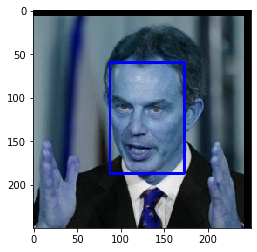

In [176]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from glob import glob
import requests
import math
import os 
 


recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainerLFW.yml')


cont=0
pth='C:/Users/click/Phyton/DNN_V2/src/LFW/test'
mypath='C:/Users/click/Phyton/DNN_V2/src/LFW/test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
print(onlyfiles)
imgPaths = [os.path.join(pth,f) for f in os.listdir(pth)]
print(len(imgPaths))
faceSamples=[]
rec = []
f=0

names=['none','Colin_Powell','Donald_Rumsfeld','George_W_Bush', 'Gerhard_Schroede', 'Hugo_Chavez', 'Tony_Blair']

ide=[]

print(len(imgPaths))
for imgPath in imgPaths:
        if(f >= 435):
            break
        
        img=cv2.imread(imgPath)
        f+=1
        if(img is not None):
            
            print("and ---->",f)
            
            face=face_detection(img)
            grayFace=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            plt.imshow(img)
            id, confid=recognizer.predict(grayFace)
        
            name=names[id]
            print('nom prédit-->',name,' nom exact-->',onlyfiles[f])
            if(name in onlyfiles[f]):
                cont+=1
        
            print(cont)
        

print("la précision du modele est de --->",100*(cont/f),"%")




In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy
import math
import os 
import requests
from timeit import default_timer as timer 


recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('C:/Users/user/LBP/model/trainerJ.yml')

In [185]:
from re import search

confusion=numpy.zeros((6,6), dtype=np.uint8)
#print(confusion)

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainerLFW.yml')


cont=0
pth='C:/Users/click/Phyton/DNN_V2/src/LFW/test'
mypath='C:/Users/click/Phyton/DNN_V2/src/LFW/test'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
#print(onlyfiles)
imgPaths = [os.path.join(pth,f) for f in os.listdir(pth)]
print(len(imgPaths))
faceSamples=[]
rec = []
f=0
print(len(onlyfiles))
#définition des noms
names=['Colin_Powell','Donald_Rumsfeld','George_W_Bush', 'Gerhard_Schroede', 'Hugo_Chavez', 'Tony_Blair']
#names=['alan_grant','claire_dearing','ellie_sattler', 'ian_malcolm', 'john_hammond', 'owen_grady']

print("taille",len(ids))

print(len(imgPaths))
#parcours du dossier
for imgPath in imgPaths:
    
    if(f >= 435 ):
        break    
    img=cv2.imread(imgPath)
    f+=1
    print(f)
    face=face_detection(img)
    grayFace=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
    #prediction de l'image en entrée
    id, confid=recognizer.predict(grayFace)
    name=names[id-1]
    #si le nom de l'image prédite est similaire a celle de l'image de test, on incrémente la diagonale.
    if(name in onlyfiles[f]):
        i=ide[f]
        j=ide[f]
        print("attribution -->",i,j,"--->",confusion[i][j])
        confusion[i][j]+=1
        
    #sinon on récupere l'indice de nom de l'image prédite afin d'incrémenter la case adéquate de l'indivdu courant
    if(name not in onlyfiles[f]):
        #print(name)
        
            
        if(name in names[names.index(name)]):
            v=names.index(name)
            #print(v)
            #print("index image prédite --->",v)
            confusion[i][v]+=1
    
    print(confusion)

           


436
436
taille 683
436
1
attribution --> 0 0 ---> 0
[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
2
attribution --> 0 0 ---> 1
[[2 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
3
attribution --> 0 0 ---> 2
[[3 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
4
attribution --> 0 0 ---> 3
[[4 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
5
attribution --> 0 0 ---> 4
[[5 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
6
[[5 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
7
attribution --> 0 0 ---> 5
[[6 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
8
[[6 1 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
9
attribution --> 0 0 ---> 6
[[7 1 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 